# GARCH Stock Forecasting

## Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [3]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [4]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

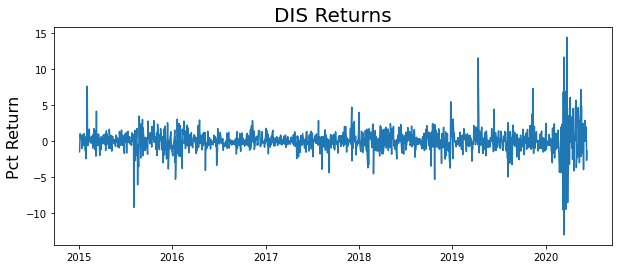

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

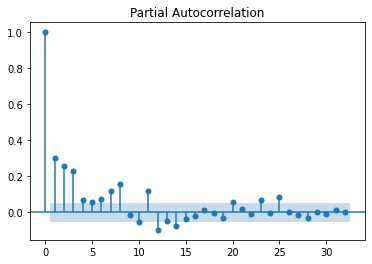

In [6]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [7]:
model = arch_model(returns, p=3, q=3)

In [8]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 42774229033.02558
Iteration:      2,   Func. Count:     22,   Neg. LLF: 983187456.0439371
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2732.2837553458935
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.188466631813
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2323.160593806452
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2330.1819177336492
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2401.748116016739
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2391.853426605202
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2299.079963875453
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2299.0832373607395
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2298.9516135029235
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2298.9391230464485
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2298.9239033717704
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2298

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2298.92
Distribution:                  Normal   AIC:                           4613.84
Method:            Maximum Likelihood   BIC:                           4655.61
                                        No. Observations:                 1368
Date:                Thu, Oct 01 2020   Df Residuals:                     1360
Time:                        18:53:56   Df Model:                            8
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.0139e-03  4.319e-02     -0.162      0.871 [-9.167e-02,7.764e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5417      0.189      2.860  4.231e-03    [  0.171,  0.913]
alpha[1]       0.0684  3.947e-02      1.733  8.314e-02 [-8.968e-03,  0.146]
alpha[2]       0.2032  9.867e-02      2.060  3.943e-02  [9.836e-03,  0.397]
alpha[3]       0.3177      0.152      2.096  3.604e-02  [2.068e-02,  0.615]
beta[1]        0.0000      0.162      0.000      1.000    [ -0.318,  0.318]
beta[2]    5.0201e-15  9.634e-02  5.211e-14      1.000    [ -0.189,  0.189]
beta[3]        0.2296      0.168      1.370      0.171 [-9.880e-02,  0.558]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [10]:
model = arch_model(returns, p=3, q=0)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3359.6816259476745
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8810.40602653609
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2258641.3646682315
Iteration:      4,   Func. Count:     31,   Neg. LLF: 590466.5931936245
Iteration:      5,   Func. Count:     38,   Neg. LLF: 15042.059133752395
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2514.8909121912434
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2448.3491616598862
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2314.879816741978
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2314.2849036125594
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2314.1439993405593
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2314.077972676416
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2314.077198148794
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2314.0771928627173
Iteration:     14,   Func. Count:     95,   Neg. LLF: 231

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -2314.08
Distribution:                  Normal   AIC:                           4638.15
Method:            Maximum Likelihood   BIC:                           4664.26
                                        No. Observations:                 1368
Date:                Thu, Oct 01 2020   Df Residuals:                     1363
Time:                        18:53:56   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.7994e-03  3.990e-02      0.246      0.806 [-6.841e-02,8.801e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8619      0.138      6.230  4.678e-10    [  0.591,  1.133]
alpha[1]       0.0886  4.530e-02      1.955  5.052e-02 [-2.022e-04,  0.177]
alpha[2]       0.2621  9.123e-02      2.873  4.060e-03  [8.334e-02,  0.441]
alpha[3]       0.3558      0.169      2.102  3.559e-02  [2.397e-02,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [13]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [14]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

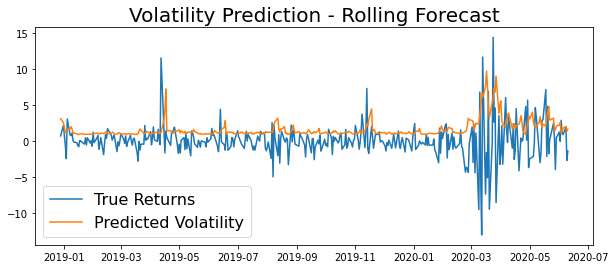

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [16]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [17]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [18]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

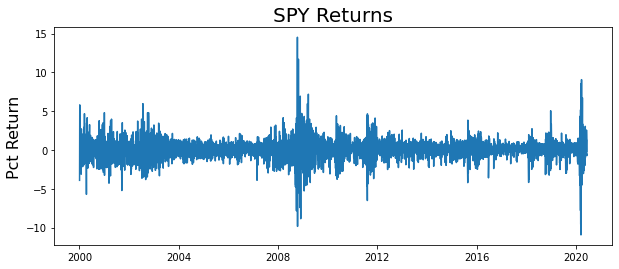

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

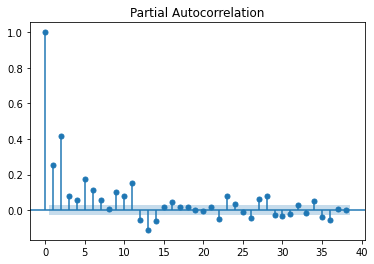

In [20]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [21]:
model = arch_model(returns, p=2, q=2)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95620.69814392301
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56371.80164298938
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11215.314828394296
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13888.451566168835
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2441056408.988779
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7231.193562218592
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7089.764026923291
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7056.837940417066
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7055.80003140911
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7053.566838785538
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7053.566735132504
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7053.566735130049
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7053.566735132504
            Iterations: 12


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -7053.57
Distribution:                  Normal   AIC:                           14119.1
Method:            Maximum Likelihood   BIC:                           14158.4
                                        No. Observations:                 5141
Date:                Thu, Oct 01 2020   Df Residuals:                     5135
Time:                        18:54:12   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.054  1.411e-09 [4.486e-02,8.782e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0407  9.930e-03      4.094  4.245e-05 [2.119e-02,6.011e-02]
alpha[1]       0.0809  2.203e-02      3.673  2.396e-04   [3.775e-02,  0.124]
alpha[2]       0.1331  3.037e-02      4.382  1.175e-05   [7.356e-02,  0.193]
beta[1]        0.2976      0.293      1.014      0.310     [ -0.277,  0.873]
beta[2]        0.4592      0.258      1.777  7.564e-02  [-4.740e-02,  0.966]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [ ]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [ ]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)